## Batch Normalization

**Paper:** https://arxiv.org/abs/1502.03167 (May 2015):

**Abstract:**
Training Deep Neural Networks is complicated by the factthat the distribution of each layer’s inputs changes duringtraining, as the parameters of the previous layers change.This slows down the training by requiring lower learningrates and careful parameter initialization, and makes it no-toriously hard to train models with saturating nonlineari-ties.  We refer to this phenomenon asinternal covariateshift,  and  address the  problem by  normalizing layer in-puts. 

Our method draws its strength from making normal-ization a part of the model architecture and performing thenormalizationfor each training mini-batch.  Batch Nor-malization allows us to use much higher learning rates andbe less careful about initialization.  It also acts as a regu-larizer, in some cases eliminating the need for Dropout.

We want to normalize a batch so it has a mean of 0 and a standard deviation of 1. We still want the model to be able to rescale and reshift the data though. For this we have to **learnable** parameters.

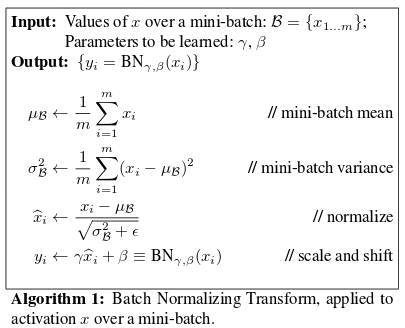

### Why ?

Usually, in order to train a neural network, we do some preprocessing to the input data. For example, we could normalize all data so that it resembles a normal distribution (that means, zero mean and a unitary variance). Why do we do this preprocessing? Well, there are many reasons for that, some of them being: preventing the early saturation of non-linear activation functions like the sigmoid function, assuring that all input data is in the same range of values, etc.

But the problem appears in the intermediate layers because the distribution of the activations is constantly changing during training. This slows down the training process because each layer must learn to adapt themselves to a new distribution in every training step. This problem is known as **internal covariate shift**.

In [69]:
import torch
from torch.autograd import Variable
from torch import Tensor, FloatTensor

In [70]:
batch = torch.randn(3,3,28,28) * 1.5 + 2

In [71]:
torch.mean(batch)

tensor(1.9976)

In [72]:
torch.std(batch)

tensor(1.4874)

In [99]:
class BatchNorm(torch.nn.Module):
    def __init__(self):
        super(BatchNorm, self).__init__()
        self.gamma = Variable(FloatTensor([1]), requires_grad=True)
        self.beta  = Variable(FloatTensor([0]), requires_grad=True)
        
    def forward(self, x):
        b_mean = torch.mean(x)
        b_std  = torch.std(x)
        
        new_x = (x - b_mean) / b_std
        
        return self.gamma * new_x + self.beta

In [100]:
bn = BatchNorm()

In [101]:
normal_b = bn(batch)

The mean of the batch is nearly 0.

In [102]:
torch.mean(normal_b)

tensor(-6.0931e-08, grad_fn=<MeanBackward0>)

The std of the batch is 1.

In [103]:
torch.std(normal_b)

tensor(1., grad_fn=<StdBackward0>)

## Batch Norm at inference

During test (or inference) time, the mean and the variance are fixed. 

Using batch normalization during inference can be a bit tricky. This is because we might not always have a batch during inference time. For example, consider running an object detector on a video in real time. A single frame is processed at once, and hence there is no batch.

This is crucial since we need to compute the mean ^x
and variance σ2 of a batch to produce the output of the batch norm layer. In that case, we keep a moving average of the mean and variance during training, and then plug these values for the mean and the variance during inference. This is the approach taken by most Deep Learning libraries that ship batch norm layers out of the box.